## Importing libraries

In [146]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score,precision_score,recall_score,plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,plot_roc_curve,roc_curve,auc
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [147]:
dataset=pd.read_csv("heart.csv")#import dataset

In [148]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Finding the number of people having and not having the disease

In [149]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

From the dataset,it is said to have 165 affected with heart disease and 138 is said to have no disease.

<AxesSubplot:xlabel='target', ylabel='count'>

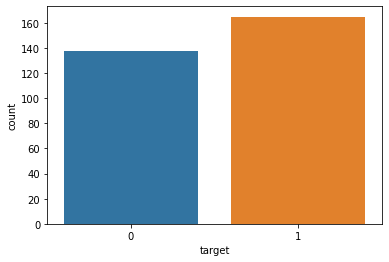

In [150]:
sns.countplot(dataset['target'])

In [151]:
total_count=dataset['target'].sum()

In [152]:
print(total_count)#count of people with illness

165


Check for any duplicates

In [153]:
dataset[dataset.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [154]:
dataset.drop_duplicates(inplace=True)

##### Correlation matrix

Text(0.5, 1.0, 'Data: Correlations between Variables')

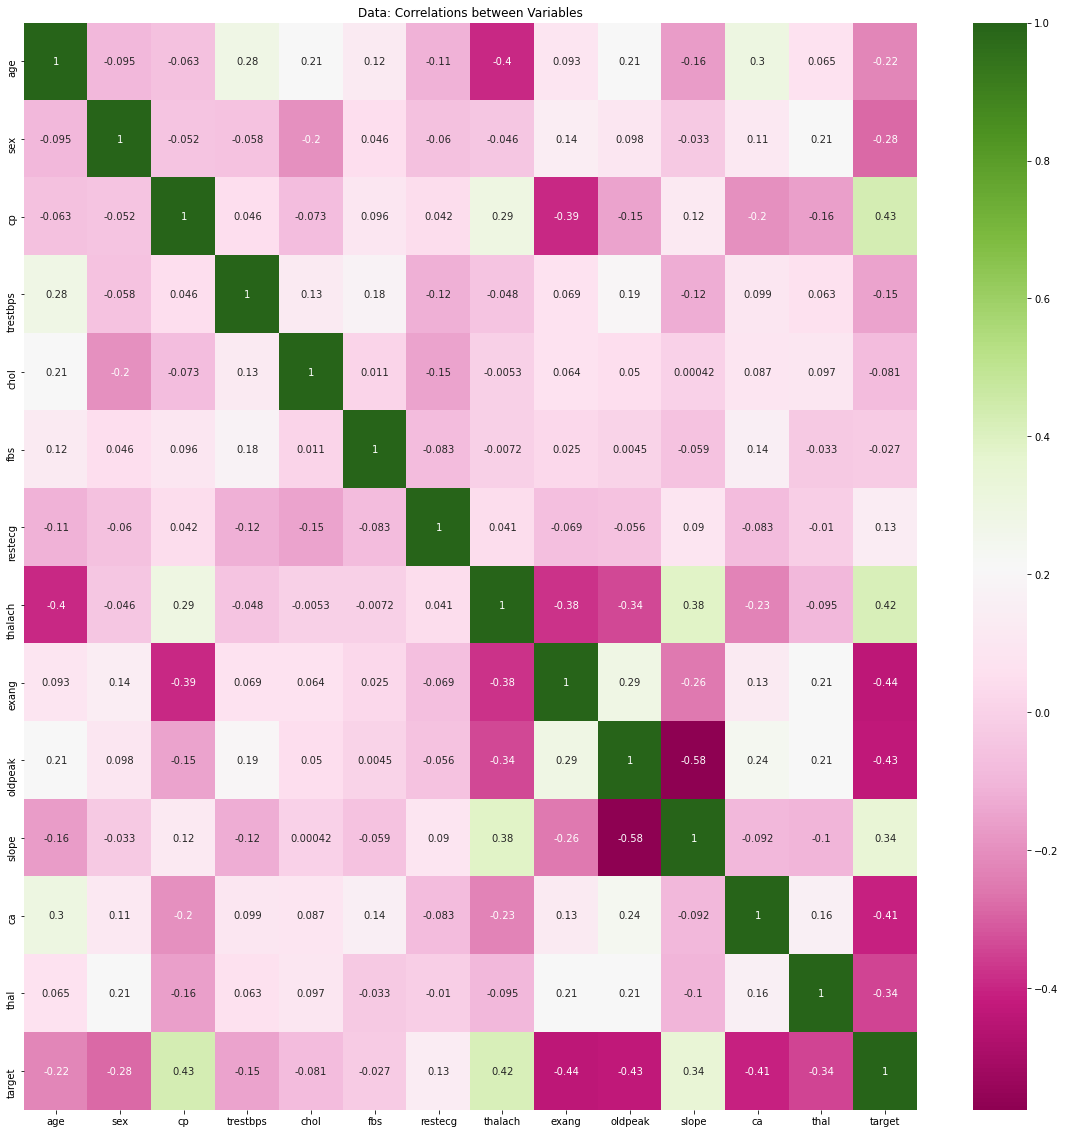

In [155]:
# Correlation between features
corr_matrix = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cmap="PiYG", annot=True, square=False, fmt=".2g")
plt.title("Data: Correlations between Variables")

In [156]:
dataset.isnull().values.any()#Check for any null values

False

In [157]:
dataset.groupby(['sex','target']).size().reset_index().rename(columns={0:'count'})

,sex,target,count
0,0,0,24
1,0,1,72
2,1,0,114
3,1,1,92


In [158]:
#Hear disease based on gender
sex=dataset['sex']
pd.crosstab(dataset['sex'],dataset['target'].eq(1), rownames={'sex'})

target,False,True
sex,,
0,24,72
1,114,92


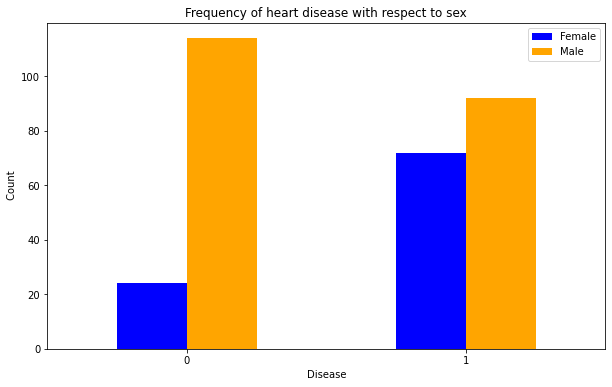

In [159]:
# plot of hear disease with respect to gender
pd.crosstab(dataset.target, dataset.sex).plot(kind = "bar",figsize=(10, 6), color = ["blue", "orange"] )
plt.title("Frequency of heart disease with respect to sex")
plt.xlabel("Disease")
plt.ylabel(" Count")

plt.legend(["Female", "Male"])

plt.xticks(rotation = 0);

Males are more prone to heart disease than females

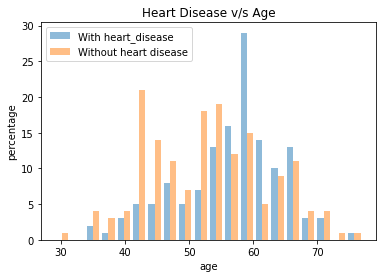

In [160]:
plt.hist([dataset[dataset.target==0].age, dataset[dataset.target==1].age], bins = 20, alpha = 0.5, label = ["With heart_disease","Without heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.title("Heart Disease v/s Age")
plt.legend()
plt.show()

People of age-group 50-60 are more prone to hert disease

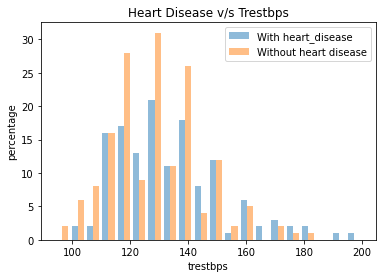

In [161]:
plt.hist([dataset[dataset.target==0].trestbps, dataset[dataset.target==1].trestbps], bins = 20, alpha = 0.5, label = ["With heart_disease","Without heart disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.title("Heart Disease v/s Trestbps")
plt.legend()
plt.show()

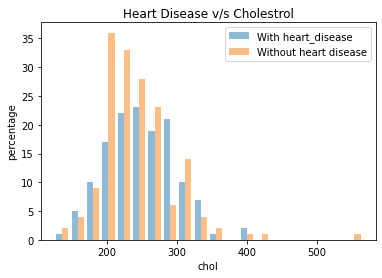

In [162]:
plt.hist([dataset[dataset.target==0].chol, dataset[dataset.target==1].chol], bins = 20, alpha = 0.5, label = ["With heart_disease","Without heart disease"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.title("Heart Disease v/s Cholestrol")
plt.legend()
plt.show()

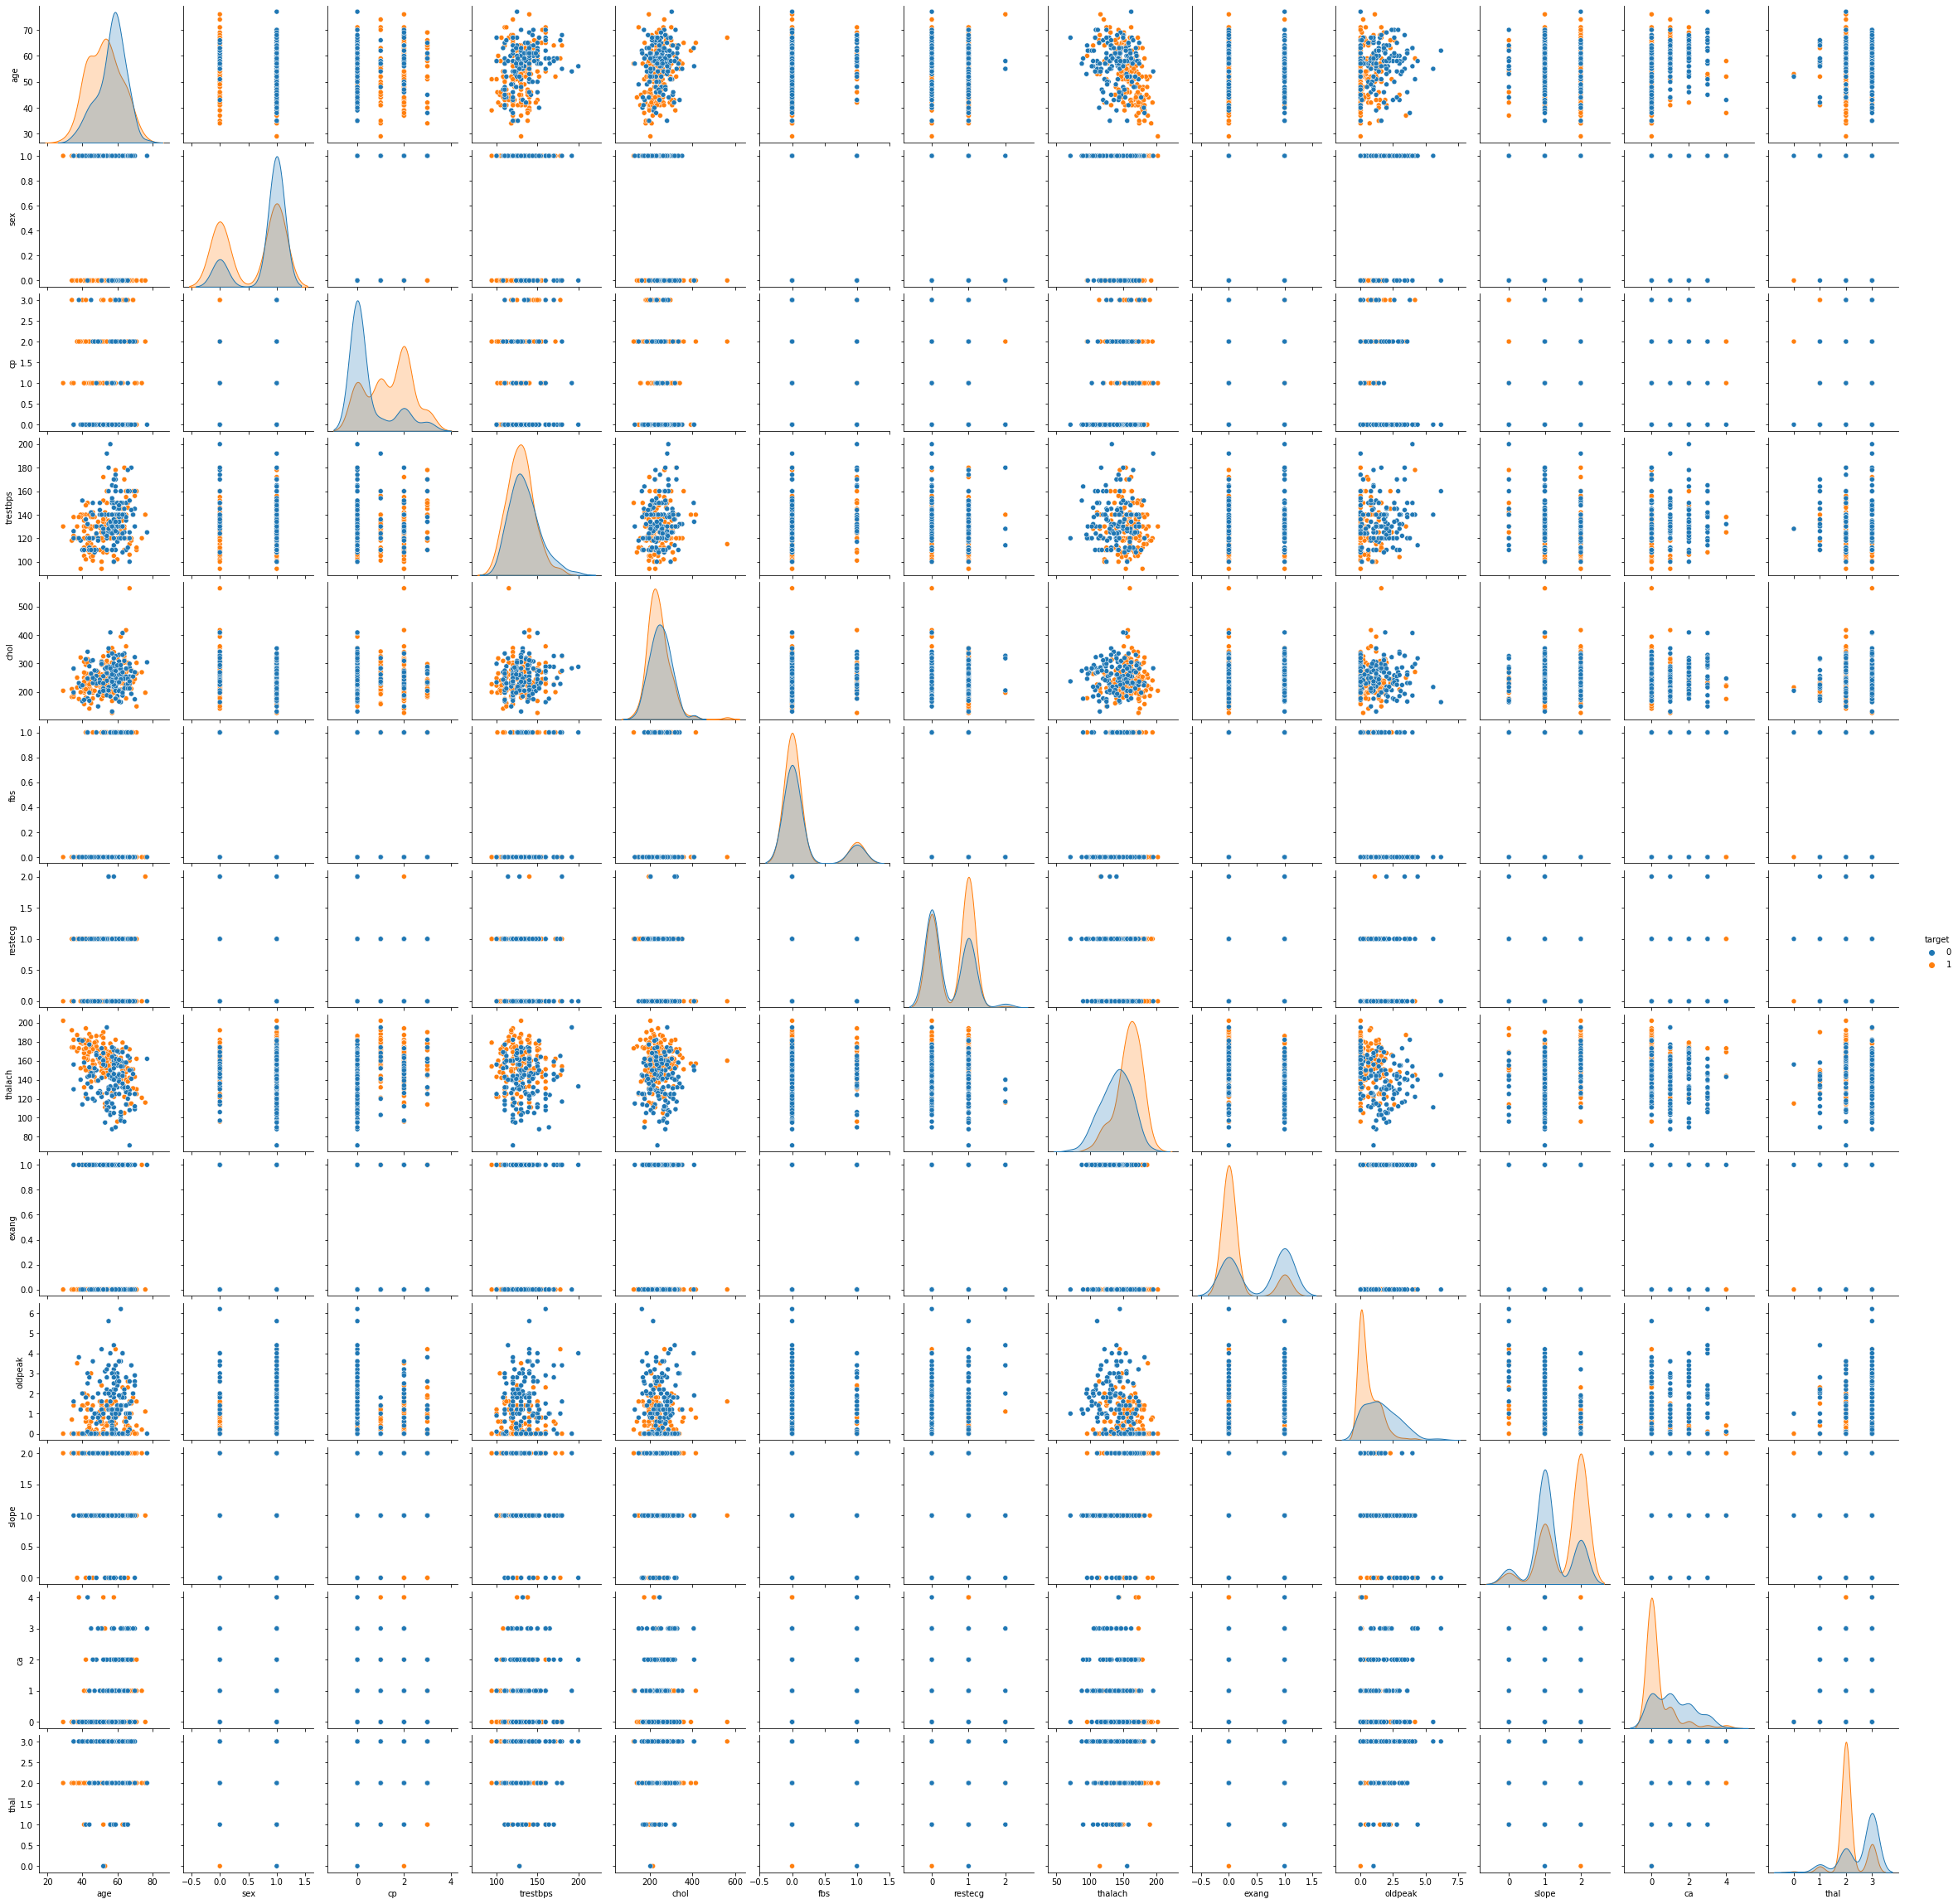

In [163]:
sns.pairplot(dataset,hue='target')

## Model Building

In [164]:
X = dataset.drop(['target'], axis = 1)
y = dataset['target']

In [165]:
# Train and test split for dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [166]:
# Standardising feature variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Perceptron

In [167]:
# Train and evaluate perceptron algorithm
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(eta0=0.1, random_state=1,max_iter=100,shuffle=True)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=1)

In [168]:
y_pred = ppn.predict(X_test)

In [169]:
accuracy=accuracy_score(y_test,y_pred)

In [170]:
accuracy

0.8524590163934426

In [171]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [172]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 9


<AxesSubplot:>

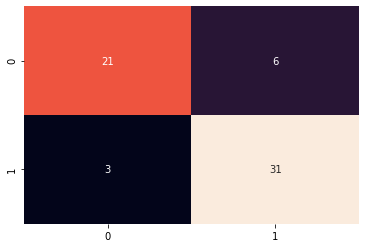

In [173]:
#plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,cbar=False)

In [174]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
fp, tp, threshold = roc_curve(y_test, y_pred)
auc_score=auc(fp, tp)

In [175]:
# Creat a dataframe to note evaluation metrics of each model
cmp_col=['Model','Accuracy','Precision','Recall','AUC']
df_compare1=pd.DataFrame(columns=cmp_col)

In [176]:
row_data={'Model':'Perceptron','Accuracy':accuracy,'Precision':precision,'Recall':recall,'AUC':auc_score}
df_compare1 = df_compare1.append(row_data, ignore_index=True)



In [177]:
df_compare1

,Model,Accuracy,Precision,Recall,AUC
0,Perceptron,0.852459,0.837838,0.911765,0.844771


## Naive Bayes

In [178]:
# Train and evaluate Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB

In [179]:
model2= GaussianNB()

In [180]:
model2.fit(X_train, y_train)

GaussianNB()

In [181]:
y_pred_nb = model2.predict(X_test)

In [182]:
accuracy_nb=accuracy_score(y_test,y_pred_nb)

In [183]:
accuracy_nb

0.9016393442622951

In [184]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [185]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<AxesSubplot:>

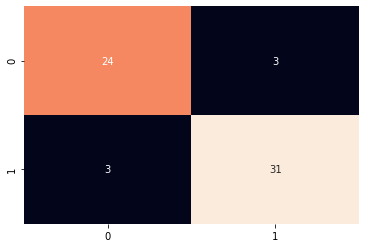

In [186]:
#Plot confusion metrics
sns.heatmap(confusion_matrix(y_test, y_pred_nb),annot=True,cbar=False)

In [187]:
accuracy=accuracy_score(y_test,y_pred_nb)
precision=precision_score(y_test, y_pred_nb)
recall=recall_score(y_test, y_pred_nb)
fp, tp, threshold = roc_curve(y_test, y_pred_nb)
auc_score=auc(fp, tp)

In [188]:
row_data={'Model':'GaussianNB','Accuracy':accuracy,'Precision':precision,'Recall':recall,'AUC':auc_score}
df_compare1 = df_compare1.append(row_data, ignore_index=True)

df_compare1

,Model,Accuracy,Precision,Recall,AUC
0,Perceptron,0.852459,0.837838,0.911765,0.844771
1,GaussianNB,0.901639,0.911765,0.911765,0.900327


## SVM

In [189]:
# Train and evaluate SVM algorithm
from sklearn.svm import SVC

In [190]:
model3=SVC()

In [191]:
model3.fit(X_train, y_train)

SVC()

In [192]:
y_pred_sv = model3.predict(X_test)

In [193]:
accuracy_sv=accuracy_score(y_test,y_pred_sv)

In [194]:
accuracy_sv

0.9344262295081968

In [195]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.97      0.91      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



<AxesSubplot:>

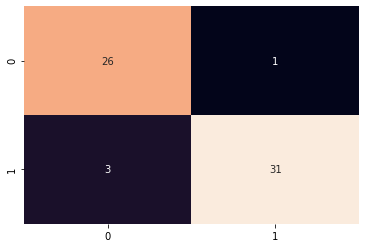

In [196]:
#Plot confusion metrics
sns.heatmap(confusion_matrix(y_test, y_pred_sv),annot=True,cbar=False)

In [197]:
# Calculate evaluation metrics for the model
accuracy=accuracy_score(y_test,y_pred_sv)
precision=precision_score(y_test, y_pred_sv)
recall=recall_score(y_test, y_pred_sv)
fp, tp, threshold = roc_curve(y_test, y_pred_sv)
auc_score=auc(fp, tp)

In [198]:
row_data={'Model':'SVM','Accuracy':accuracy,'Precision':precision,'Recall':recall,'AUC':auc_score}
df_compare1 = df_compare1.append(row_data, ignore_index=True)

df_compare1

,Model,Accuracy,Precision,Recall,AUC
0,Perceptron,0.852459,0.837838,0.911765,0.844771
1,GaussianNB,0.901639,0.911765,0.911765,0.900327
2,SVM,0.934426,0.968750,0.911765,0.937364


## Decision Tree Classifier

In [199]:
# Train and evaluate Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier,plot_tree

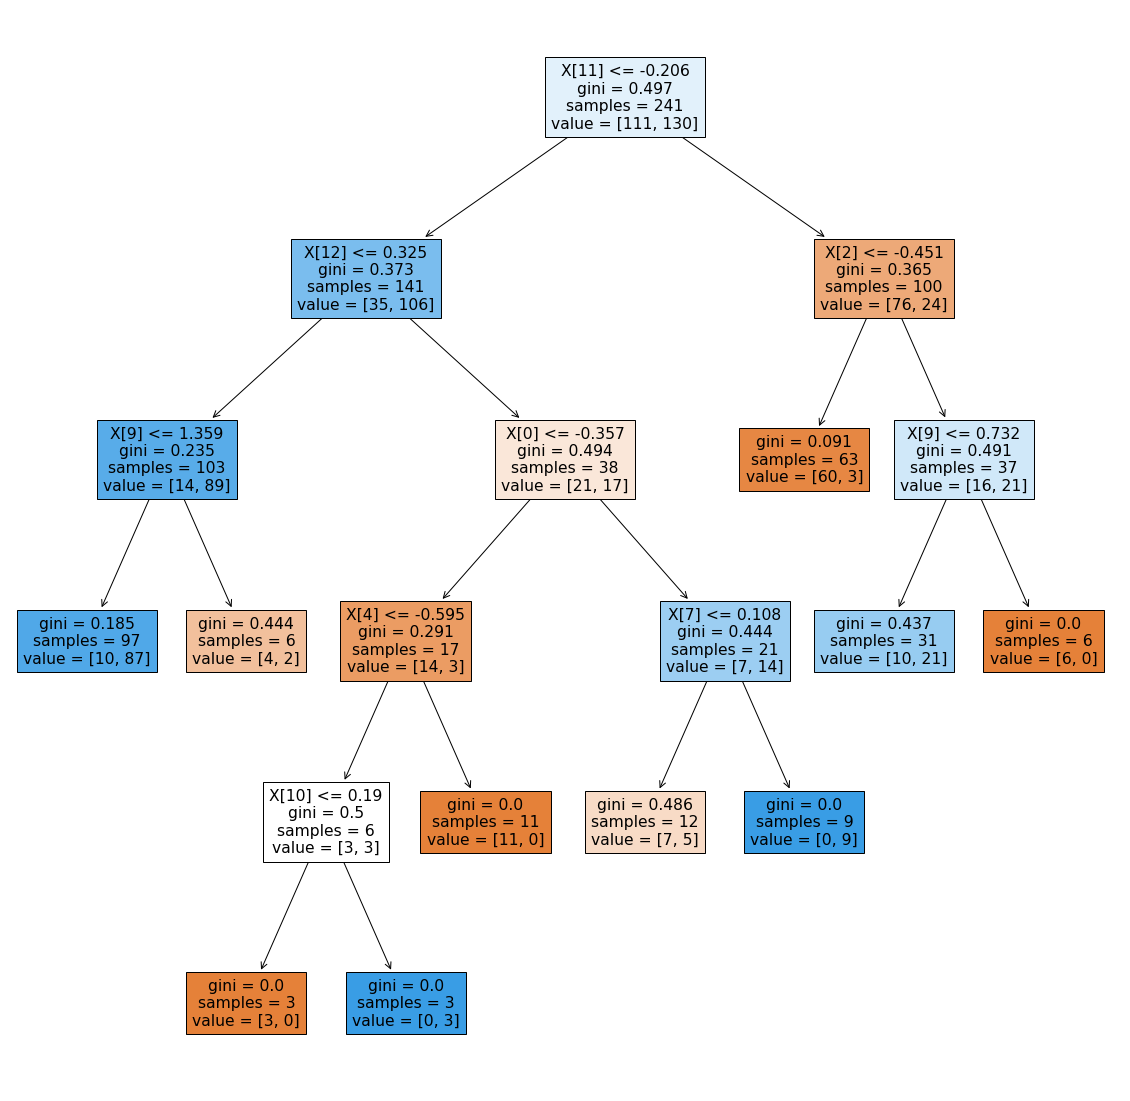

In [200]:
model4 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01).fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(model4, filled=True)
plt.show()

In [201]:
model4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [202]:
y_pred_dt = model4.predict(X_test)

In [203]:
accuracy_dt=accuracy_score(y_test,y_pred_dt)

In [204]:
accuracy_dt

0.819672131147541

In [205]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



<AxesSubplot:>

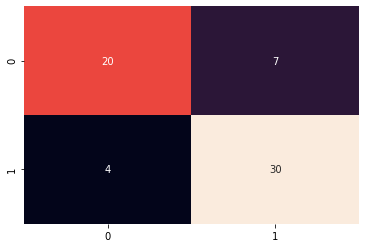

In [206]:
# Plot confusion metrics
sns.heatmap(confusion_matrix(y_test, y_pred_dt),annot=True,cbar=False)

In [207]:
accuracy=accuracy_score(y_test,y_pred_dt)
precision=precision_score(y_test, y_pred_dt)
recall=recall_score(y_test, y_pred_dt)
fp, tp, threshold = roc_curve(y_test, y_pred_dt)
auc_score=auc(fp, tp)

In [208]:
row_data={'Model':'Decision Tree Classifier','Accuracy':accuracy,'Precision':precision,'Recall':recall,'AUC':auc_score}
df_compare1 = df_compare1.append(row_data, ignore_index=True)

df_compare1

,Model,Accuracy,Precision,Recall,AUC
0,Perceptron,0.852459,0.837838,0.911765,0.844771
1,GaussianNB,0.901639,0.911765,0.911765,0.900327
2,SVM,0.934426,0.968750,0.911765,0.937364
3,Decision Tree Classifier,0.819672,0.810811,0.882353,0.811547


## KNN

In [209]:
# Train and evaluate KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

In [210]:
model5=KNeighborsClassifier()
model5.fit(X_train,y_train)
y_pred_knn=model5.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_knn)
print("accuracy is:",accuracy)

accuracy is: 0.9180327868852459


In [211]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



<AxesSubplot:>

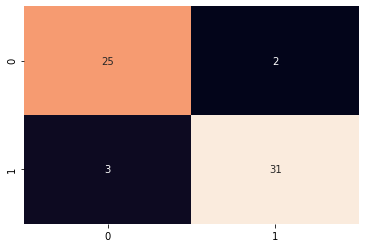

In [212]:
# Plot confusion metrics
sns.heatmap(confusion_matrix(y_test, y_pred_knn),annot=True,cbar=False)

For different k values

In [213]:
# Evaluatign KNN model with different values of K
from sklearn import metrics
acc_mean = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    acc_mean[i-1] = metrics.accuracy_score(y_test, yhat)

acc_mean

array([0.85245902, 0.81967213, 0.91803279, 0.8852459 , 0.91803279,
       0.8852459 , 0.91803279, 0.91803279, 0.90163934, 0.8852459 ,
       0.86885246, 0.8852459 , 0.90163934, 0.86885246, 0.90163934,
       0.91803279, 0.8852459 , 0.8852459 , 0.8852459 , 0.8852459 ])

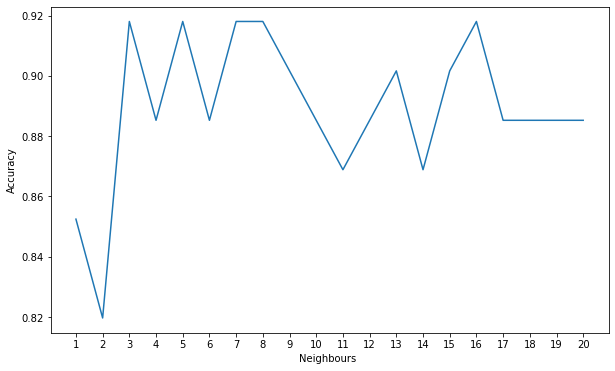

In [214]:
# Plotting the accuracy of KNN for different values of K
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), acc_mean)
plt.xticks(loc)
plt.xlabel('Neighbours ')
plt.ylabel('Accuracy')
plt.show()

In [215]:
accuracy=accuracy_score(y_test,y_pred_knn)
precision=precision_score(y_test, y_pred_knn)
recall=recall_score(y_test, y_pred_knn)
fp, tp, threshold = roc_curve(y_test, y_pred_knn)
auc_score=auc(fp, tp)

In [216]:
row_data={'Model':'KNN','Accuracy':accuracy,'Precision':precision,'Recall':recall,'AUC':auc_score}
df_compare1 = df_compare1.append(row_data, ignore_index=True)

df_compare1

,Model,Accuracy,Precision,Recall,AUC
0,Perceptron,0.852459,0.837838,0.911765,0.844771
1,GaussianNB,0.901639,0.911765,0.911765,0.900327
2,SVM,0.934426,0.968750,0.911765,0.937364
3,Decision Tree Classifier,0.819672,0.810811,0.882353,0.811547
4,KNN,0.918033,0.939394,0.911765,0.918845


## Comparising the algorithms based on Cross validation

In [217]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold

Perceptron: 0.771333(0.078077)
KNN: 0.779833(0.091798)
NB: 0.808833(0.054001)
Decision Tree: 0.780167(0.041281)
SVM: 0.792167(0.083845)


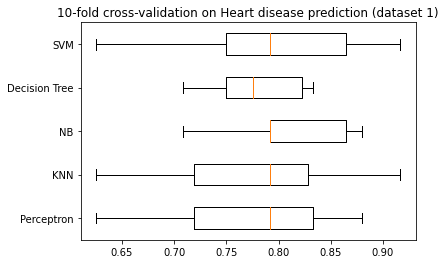

In [218]:
# Compare the model performance based on cross validation score
# Refered from Lab of MLDM module
models=[]
models.append(('Perceptron',Perceptron(eta0=0.1, random_state=1,max_iter=100,shuffle=True)))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)))
models.append(('SVM',SVC()))
results=[]
names=[]
acc_mean_1=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=7,shuffle=True)
    cv_results_d1=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results_d1)
    names.append(name)
    #std1.append(cv_results1.std())
    acc_mean_1.append(cv_results_d1.mean())
    msg="%s: %f(%f)" %(name,cv_results_d1.mean(),cv_results_d1.std())
    print(msg)
pyplot.boxplot(results, labels=names,vert=False)
pyplot.title('10-fold cross-validation on Heart disease prediction (dataset 1)')
pyplot.show()

In [219]:
acc_mean_1    

[0.7713333333333333,
 0.7798333333333334,
 0.8088333333333333,
 0.7801666666666666,
 0.7921666666666665]

## Comparison of the models

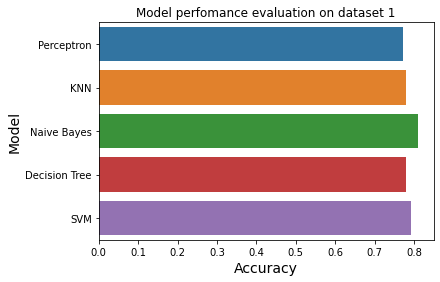

In [220]:
# Plot a bar diagram visualising the performnace of each model on heart disease dataset
a=['Perceptron','KNN','Naive Bayes','Decision Tree','SVM']

ax=sns.barplot(acc_mean_1,a)

plt.title("Model perfomance evaluation on dataset 1")
plt.xlabel("Accuracy", size=14)
plt.ylabel("Model", size=14)
plt.show()

In [221]:
models=[Perceptron(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),SVC()]

In [222]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

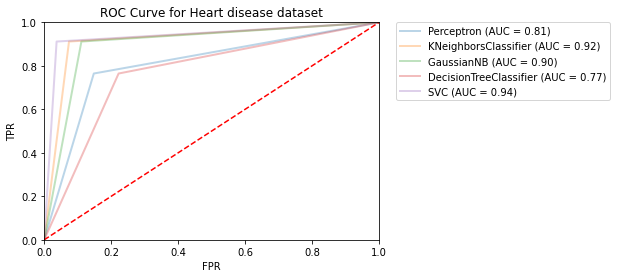

In [223]:
# Calculate and plot ROC curve for each modelon heart disease dataset
index = 1
for i in models:
    
    
    prediction = i.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, prediction)
    roc_auc_model = auc(fp, tp)
    model_name = i.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='%s (AUC = %0.2f)'  % (model_name, roc_auc_model))
   
    index+=1

plt.title('ROC Curve for Heart disease dataset')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')    
plt.show()


# Dataset 2

pip install plotly

### Data Exploration and Preprocessing

In [224]:
# Read and display stroke dataset
df_stroke= pd.read_csv('healthcare-dataset-stroke-data.csv')
df_stroke.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [225]:
# print basic information of the dataset
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [226]:
# Print the null values in each columns of the dataset
df_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We can see that 201 value is empty for the column bmi 

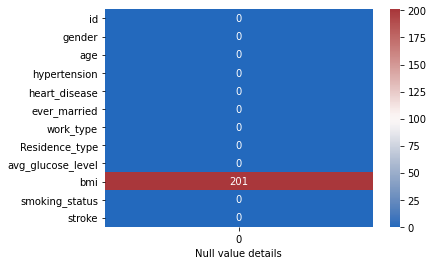

In [227]:
# Visualise the null value count in each column 
ax = sns.heatmap(df_stroke.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Null value details')
plt.show()


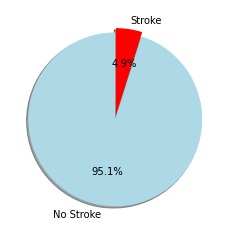

In [228]:
#Pie chart for stroke count in dataset
stroke_count=df_stroke['stroke'].value_counts()
plt.pie(stroke_count, explode=(0.05,0), labels=['No Stroke','Stroke'], colors=["lightblue","red"], autopct='%1.1f%%', shadow=True, startangle=90,)
plt.show() 

### Data Preprocessing

In [229]:
# Encoding categorical variable using label encoder function

encoder = LabelEncoder()
df_final = df_stroke.apply(encoder.fit_transform)
df_final.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,239,1,1
1,3610,0,82,0,0,1,3,0,3588,418,2,1
2,2151,1,101,0,1,1,2,0,2483,198,2,1
3,4226,0,70,0,0,1,2,1,3385,217,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1


In [230]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 5110 non-null   int64
 1   gender             5110 non-null   int32
 2   age                5110 non-null   int64
 3   hypertension       5110 non-null   int64
 4   heart_disease      5110 non-null   int64
 5   ever_married       5110 non-null   int32
 6   work_type          5110 non-null   int32
 7   Residence_type     5110 non-null   int32
 8   avg_glucose_level  5110 non-null   int64
 9   bmi                5110 non-null   int64
 10  smoking_status     5110 non-null   int32
 11  stroke             5110 non-null   int64
dtypes: int32(5), int64(7)
memory usage: 379.4 KB


In [231]:
# Replacing null values in the bmi columns with KNN imputer function of sklearn
imp_fn = KNNImputer(n_neighbors=4, weights="uniform")
imp_fn.fit_transform(df_final)

array([[6.710e+02, 1.000e+00, 8.800e+01, ..., 2.390e+02, 1.000e+00,
        1.000e+00],
       [3.610e+03, 0.000e+00, 8.200e+01, ..., 4.180e+02, 2.000e+00,
        1.000e+00],
       [2.151e+03, 1.000e+00, 1.010e+02, ..., 1.980e+02, 2.000e+00,
        1.000e+00],
       ...,
       [1.396e+03, 0.000e+00, 5.600e+01, ..., 1.790e+02, 2.000e+00,
        0.000e+00],
       [2.601e+03, 1.000e+00, 7.200e+01, ..., 1.290e+02, 1.000e+00,
        0.000e+00],
       [3.089e+03, 0.000e+00, 6.500e+01, ..., 1.350e+02, 0.000e+00,
        0.000e+00]])

In [232]:
df_final.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Figure size 1224x504 with 0 Axes>

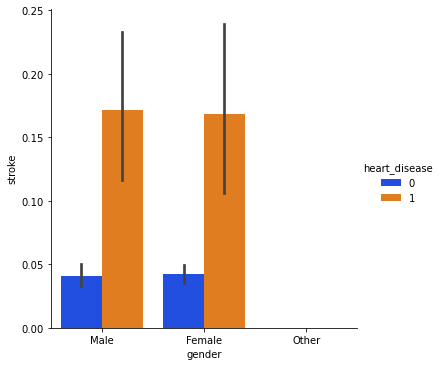

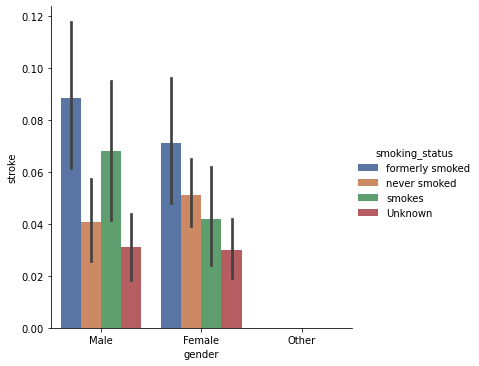

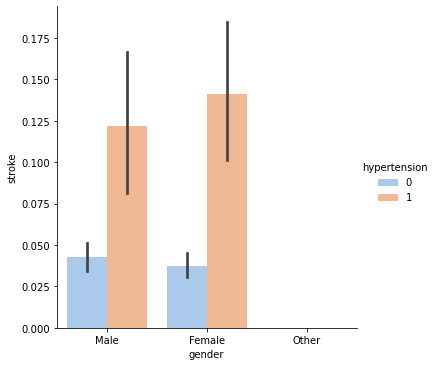

In [233]:
# plot to compare the relation of stroke with other features in datasset
plt.figure(figsize=(17,7))
# plot heart disease and stroke relation for each gender
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="bright", kind="bar", data=df_stroke)
# plot Smoking and stroke relation for each gender
sns.catplot(x="gender", y="stroke", hue="smoking_status", palette="deep", kind="bar", data=df_stroke)
# plot heart Hyper tension and stroke relation for each gender
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=df_stroke)
plt.show()

Visualise shows the effect of certain features on stroke

Text(0.5, 1.0, 'Feature Correlation Plot')

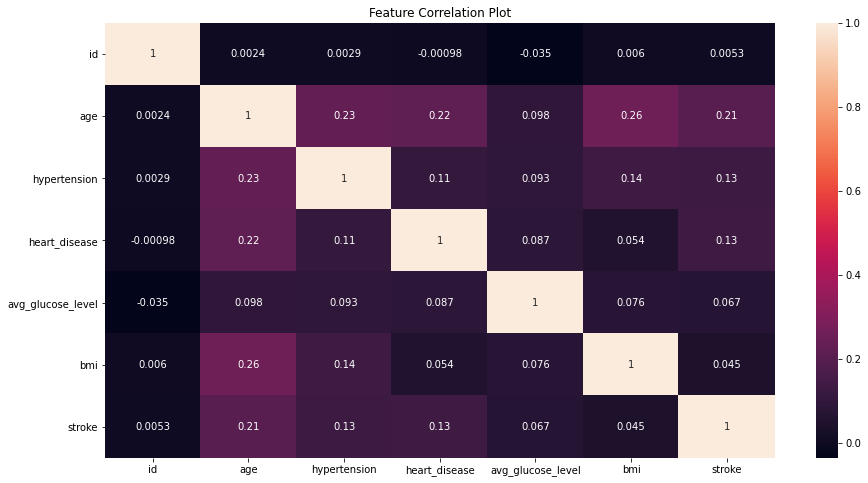

In [234]:
# Correlation plot between feature in stroke datset
corr = df_stroke.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.title("Feature Correlation Plot")

### Modeling and Evaluation

In [235]:
# Assign feature and label to a variable
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
label=['stroke']


In [236]:
df_final

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,239,1,1
1,3610,0,82,0,0,1,3,0,3588,418,2,1
2,2151,1,101,0,1,1,2,0,2483,198,2,1
3,4226,0,70,0,0,1,2,1,3385,217,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1312,0,101,1,0,1,2,1,1360,418,2,0
5106,3100,0,102,0,0,1,3,1,3030,273,2,0
5107,1396,0,56,0,0,1,3,0,1314,179,2,0
5108,2601,1,72,0,0,1,2,0,3363,129,1,0


In [237]:
X=df_final[features]
y=df_final[label]

In [238]:
# Test train split for our data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [239]:
# Standardizing data

std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

Testing Score 
 0.9483568075117371
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



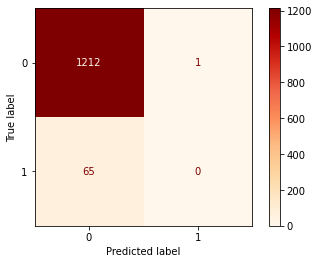

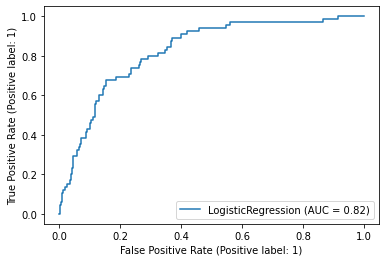

In [240]:
# basic logistic regression model 
model=LogisticRegression()
model.fit(x_train,y_train)
score = model.score(x_test, y_test)
model_train_score = model.score(x_train, y_train)
model_test_score = model.score(x_test, y_test)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Testing Score \n',score)
plot_confusion_matrix(model,x_test,y_test,cmap="OrRd")
plot_roc_curve(model, x_test, y_test)
print(classification_report(y_test,y_pred))

In [241]:
    
importances = pd.DataFrame(data={
    'Attribute': features,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

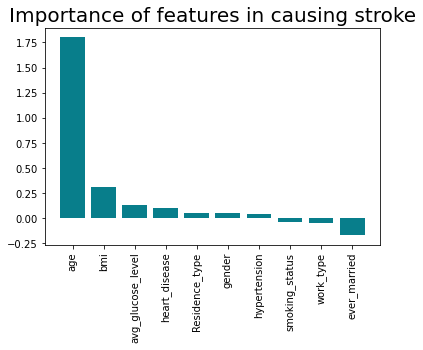

In [242]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Importance of features in causing stroke', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Treating Imbalance Using SMOTE

pip install imblearn

In [243]:
# Imbalance issue is solved using SMOTE function of the imblearn library
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

In [244]:
X_train,X_test, y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.33,random_state=42)

In [245]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5011,0,75,0,0,1,2,1,904,168,3
6550,0,97,0,1,1,2,0,3944,162,1
7395,1,88,0,0,1,2,0,3854,245,1
847,1,65,0,0,1,2,1,122,117,2
938,0,44,0,0,0,2,0,1867,174,2
...,...,...,...,...,...,...,...,...,...,...
5734,0,95,1,1,0,0,0,3732,171,1
5191,0,96,0,0,0,1,1,599,101,2
5390,0,92,0,0,1,2,0,2644,168,2
860,0,67,0,0,1,2,0,2240,364,3


### Logistic Regression

Testing Score 
 0.7890308507323154
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1604
           1       0.77      0.82      0.80      1605

    accuracy                           0.79      3209
   macro avg       0.79      0.79      0.79      3209
weighted avg       0.79      0.79      0.79      3209



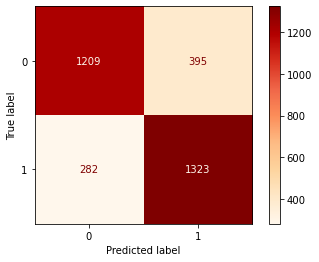

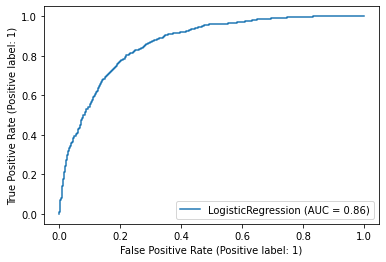

In [246]:
# Training the Logistic Regression model again with balance dataset
model=LogisticRegression()
model.fit(X_train,y_train)
score = model.score(X_test, y_test)
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Testing Score \n',score)
plot_confusion_matrix(model,X_test,y_test,cmap="OrRd")
plot_roc_curve(model, X_test, y_test)  
print(classification_report(y_test,y_pred))

In [247]:
#Storing Accuracy, precision, recall and AUC to variables
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
fp, tp, threshold = roc_curve(y_test, y_pred)
auc_score=auc(fp, tp)

In [248]:
#Creating a Data Frame to store the results of each table to make comparison easier 
cmp_col=['Model','Accuracy','Precision','Recall','AUC']
df_compare2=pd.DataFrame(columns=cmp_col)

In [249]:
row_data={'Model':'Logistic Regression','Accuracy':accuracy,'Precision':precision,'Recall':recall,'AUC':auc_score}
df_compare2 = df_compare2.append(row_data, ignore_index=True)



## Perceptron


Testing Score 
 0.7890308507323154
              precision    recall  f1-score   support

           0       0.50      0.96      0.66      1604
           1       0.56      0.05      0.09      1605

    accuracy                           0.51      3209
   macro avg       0.53      0.51      0.38      3209
weighted avg       0.53      0.51      0.38      3209



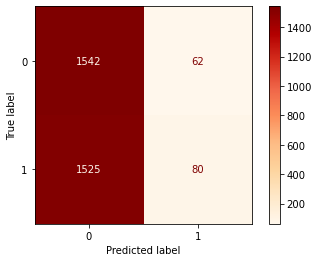

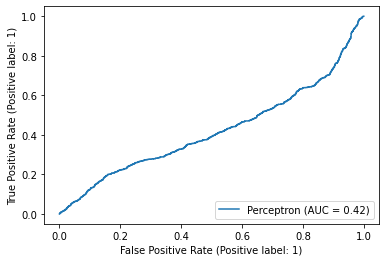

In [250]:
#Training and Evaluation Perceptron model
ppn = Perceptron(eta0=0.1, random_state=1,max_iter=10,shuffle=True)
ppn.fit(X_train, y_train)
y_pred_perc = ppn.predict(X_test)
cm = confusion_matrix(y_test,y_pred_perc)
print('Testing Score \n',score)
plot_confusion_matrix(ppn,X_test,y_test,cmap="OrRd")
plot_roc_curve(ppn, X_test, y_test)  
print(classification_report(y_test,y_pred_perc))

In [251]:
#Storing Accuracy, precision, recall and AUC to variables
accuracy=accuracy_score(y_test,y_pred_perc)
precision=precision_score(y_test, y_pred_perc)
recall=recall_score(y_test, y_pred_perc)
fp, tp, threshold = roc_curve(y_test, y_pred_perc)
auc_score=auc(fp, tp)

In [252]:
row_data={'Model':'Perceptron','Accuracy':accuracy,'Precision':precision,'Recall':recall,'AUC':auc_score}
df_compare2 = df_compare2.append(row_data, ignore_index=True)

df_compare2

,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.789031,0.770081,0.824299,0.789020
1,Perceptron,0.505453,0.563380,0.049844,0.505595


### Naive Bayes

Testing Score 
 0.7890308507323154
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1604
           1       0.76      0.88      0.81      1605

    accuracy                           0.80      3209
   macro avg       0.81      0.80      0.80      3209
weighted avg       0.81      0.80      0.80      3209



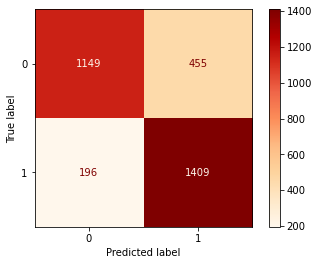

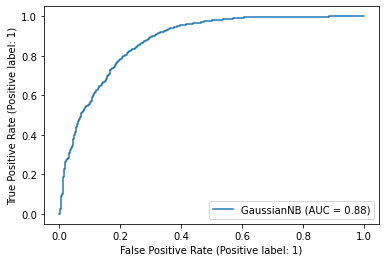

In [253]:
from sklearn.naive_bayes import GaussianNB
model2= GaussianNB()
model2.fit(X_train, y_train)
y_pred_nb = model2.predict(X_test)
cm = confusion_matrix(y_test,y_pred_nb)
print('Testing Score \n',score)
plot_confusion_matrix(model2,X_test,y_test,cmap="OrRd")
plot_roc_curve(model2, X_test, y_test)  
print(classification_report(y_test,y_pred_nb))

In [254]:
#Storing Accuracy, precision, recall and AUC to variables
accuracy=accuracy_score(y_test,y_pred_nb)
precision=precision_score(y_test, y_pred_nb)
recall=recall_score(y_test, y_pred_nb)
fp, tp, threshold = roc_curve(y_test, y_pred_nb)
auc_score=auc(fp, tp)

In [255]:
row_data={'Model':'GaussianNB','Accuracy':accuracy,'Precision':precision,'Recall':recall,'AUC':auc_score}
df_compare2 = df_compare2.append(row_data, ignore_index=True)

df_compare2

,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.789031,0.770081,0.824299,0.789020
1,Perceptron,0.505453,0.563380,0.049844,0.505595
2,GaussianNB,0.797133,0.755901,0.877882,0.797108


### SVM

Testing Score 
 0.7890308507323154
              precision    recall  f1-score   support

           0       0.64      0.79      0.70      1604
           1       0.72      0.55      0.63      1605

    accuracy                           0.67      3209
   macro avg       0.68      0.67      0.67      3209
weighted avg       0.68      0.67      0.67      3209



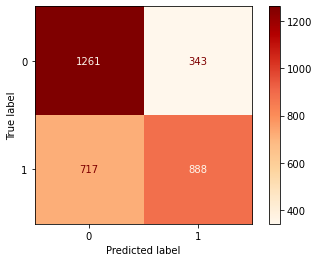

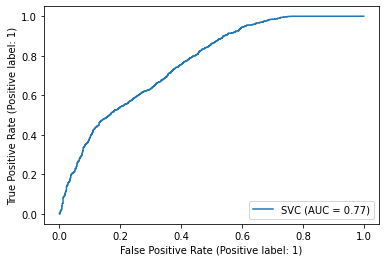

In [256]:
# Training and Evaluation SVM model
model3=SVC()
model3.fit(X_train, y_train)
y_pred_sv = model3.predict(X_test)
cm = confusion_matrix(y_test,y_pred_sv)
print('Testing Score \n',score)
plot_confusion_matrix(model3,X_test,y_test,cmap="OrRd")
plot_roc_curve(model3, X_test, y_test)  
print(classification_report(y_test,y_pred_sv))

In [257]:
#Storing Accuracy, precision, recall and AUC to variables
accuracy=accuracy_score(y_test,y_pred_nb)
precision=precision_score(y_test, y_pred_nb)
recall=recall_score(y_test, y_pred_nb)
fp, tp, threshold = roc_curve(y_test, y_pred_nb)
auc_score=auc(fp, tp)

In [258]:
row_data={'Model':'SVM','Accuracy':accuracy,'Precision':precision,'Recall':recall,'AUC':auc_score}
df_compare2 = df_compare2.append(row_data, ignore_index=True)

df_compare2

,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.789031,0.770081,0.824299,0.789020
1,Perceptron,0.505453,0.563380,0.049844,0.505595
2,GaussianNB,0.797133,0.755901,0.877882,0.797108
3,SVM,0.797133,0.755901,0.877882,0.797108


### Decision Tree

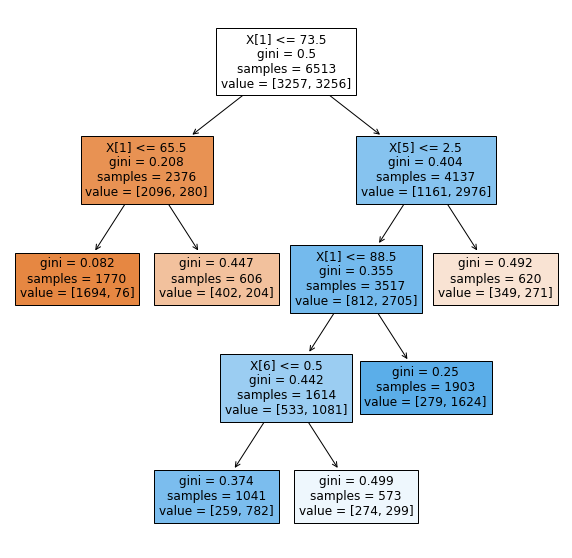

In [259]:
# Train and Evaluate Decision Tree Classifier
model4 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005).fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(model4, filled=True)
plt.show()

Testing Score 
 0.7890308507323154
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1604
           1       0.76      0.83      0.79      1605

    accuracy                           0.78      3209
   macro avg       0.78      0.78      0.78      3209
weighted avg       0.78      0.78      0.78      3209



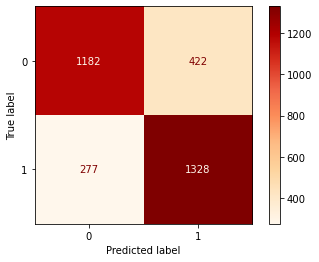

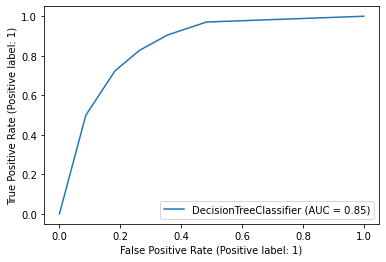

In [260]:
model4.fit(X_train, y_train)
y_pred_dt = model4.predict(X_test)
cm = confusion_matrix(y_test,y_pred_dt)
print('Testing Score \n',score)
plot_confusion_matrix(model4,X_test,y_test,cmap="OrRd")
plot_roc_curve(model4, X_test, y_test)  
print(classification_report(y_test,y_pred_dt))

In [261]:
#Storing Accuracy, precision, recall and AUC to variables
accuracy=accuracy_score(y_test,y_pred_dt)
precision=precision_score(y_test, y_pred_dt)
recall=recall_score(y_test, y_pred_dt)
fp, tp, threshold = roc_curve(y_test, y_pred_dt)
auc_score=auc(fp, tp)

In [262]:
row_data={'Model':'Decision Tree','Accuracy':accuracy,'Precision':precision,'Recall':recall,'AUC':auc_score}
df_compare2 = df_compare2.append(row_data, ignore_index=True)

df_compare2

,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.789031,0.770081,0.824299,0.789020
1,Perceptron,0.505453,0.563380,0.049844,0.505595
2,GaussianNB,0.797133,0.755901,0.877882,0.797108
3,SVM,0.797133,0.755901,0.877882,0.797108
4,Decision Tree,0.782175,0.758857,0.827414,0.782161


### KNeighborsClassifier

Testing Score 
 0.7890308507323154
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1604
           1       0.80      0.95      0.87      1605

    accuracy                           0.85      3209
   macro avg       0.87      0.85      0.85      3209
weighted avg       0.87      0.85      0.85      3209



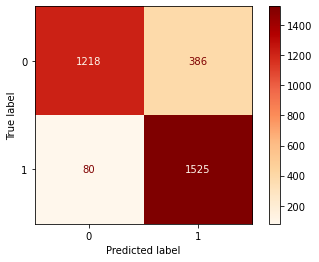

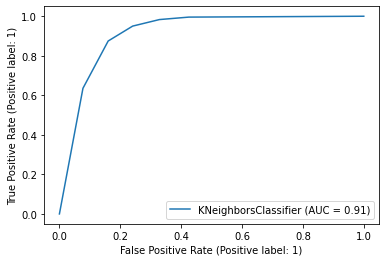

In [263]:
#Train and Evaluate KNeighbour Classifier
model5=KNeighborsClassifier()
model5.fit(X_train,y_train)
y_pred_knn=model5.predict(X_test)
cm = confusion_matrix(y_test,y_pred_knn)
print('Testing Score \n',score)
plot_confusion_matrix(model5,X_test,y_test,cmap="OrRd")
plot_roc_curve(model5, X_test, y_test)  
print(classification_report(y_test,y_pred_knn))


In [264]:
#Storing Accuracy, precision, recall and AUC to variables
accuracy=accuracy_score(y_test,y_pred_knn)
precision=precision_score(y_test, y_pred_knn)
recall=recall_score(y_test, y_pred_knn)
fp, tp, threshold = roc_curve(y_test, y_pred_knn)
auc_score=auc(fp, tp)

In [265]:
row_data={'Model':'KNeighbour','Accuracy':accuracy,'Precision':precision,'Recall':recall,'AUC':auc_score}
df_compare2 = df_compare2.append(row_data, ignore_index=True)

df_compare2

,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.789031,0.770081,0.824299,0.789020
1,Perceptron,0.505453,0.563380,0.049844,0.505595
2,GaussianNB,0.797133,0.755901,0.877882,0.797108
3,SVM,0.797133,0.755901,0.877882,0.797108
4,Decision Tree,0.782175,0.758857,0.827414,0.782161
5,KNeighbour,0.854783,0.798012,0.950156,0.854754


accuracy variation for different K values

In [266]:
# Calculate the accuracy of KNN model for variation of K
from sklearn import metrics
acc_mean = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    acc_mean[i-1] = metrics.accuracy_score(y_test, yhat)

acc_mean

array([0.88158305, 0.86631349, 0.87129947, 0.86537862, 0.85478342,
       0.86008102, 0.85042069, 0.85540667, 0.83515114, 0.84200686,
       0.82704892, 0.83390464, 0.81925834, 0.82580243, 0.81832347,
       0.82112808, 0.82050483, 0.82112808, 0.8161421 , 0.81645372])

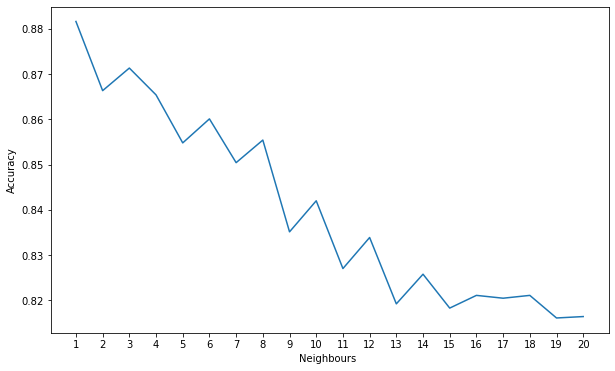

In [267]:
#Plot Accuracy variation with values of K 
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), acc_mean)
plt.xticks(loc)
plt.xlabel('Neighbours ')
plt.ylabel('Accuracy')
plt.show()

### Cross Validation score Comparisons

In [268]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold

Perceptron: 0.500079(0.013217)
KNN: 0.851526(0.015157)
NB: 0.799933(0.012757)
Decision Tree: 0.787807(0.012223)
SVM: 0.655613(0.013003)


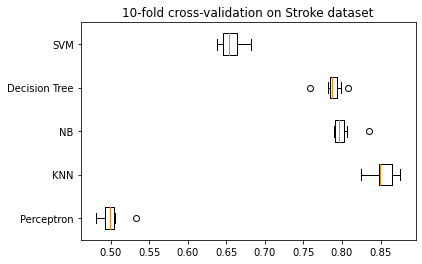

In [269]:
# Compare model using the cross valudation score
# Code referenced from Lab of MLDM module
models=[]
models.append(('Perceptron',Perceptron(eta0=0.1, random_state=1,max_iter=100,shuffle=True)))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)))
models.append(('SVM',SVC()))
results=[]
names=[]
acc_mean_2=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=7,shuffle=True)
    cv_results_d1=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results_d1)
    names.append(name)
    #std1.append(cv_results1.std())
    acc_mean_2.append(cv_results_d1.mean())
    msg="%s: %f(%f)" %(name,cv_results_d1.mean(),cv_results_d1.std())
    print(msg)
pyplot.boxplot(results, labels=names,vert=False)
pyplot.title('10-fold cross-validation on Stroke dataset')
pyplot.show()

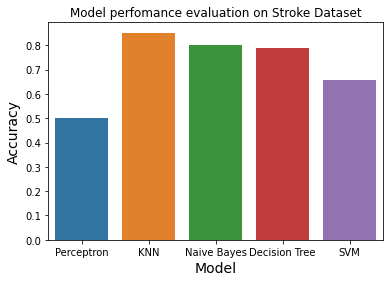

In [270]:
# Plot performance of various algorithm using bar plot
model_list=['Perceptron','KNN','Naive Bayes','Decision Tree','SVM']

ax=sns.barplot(model_list,acc_mean_2)

plt.title("Model perfomance evaluation on Stroke Dataset")
plt.ylabel("Accuracy", size=14)
plt.xlabel("Model", size=14)
plt.show()

### ROC Curve for different models

In [271]:
models=[Perceptron(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),SVC()]

In [272]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

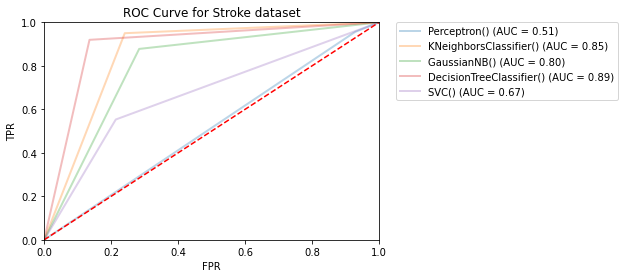

In [273]:
#Calculate and plot ROC curve for each model in stroke dataset
index = 1
for i in models:
    
    
    prediction = i.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, prediction)
    roc_auc_model = auc(fp, tp)

    plt.plot(fp, tp, lw=2, alpha=0.3, label='%s (AUC = %0.2f)'  % (i, roc_auc_model))
   
    index+=1

plt.title('ROC Curve for Stroke dataset')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')    
plt.show()


In [274]:
df_compare1

,Model,Accuracy,Precision,Recall,AUC
0,Perceptron,0.852459,0.837838,0.911765,0.844771
1,GaussianNB,0.901639,0.911765,0.911765,0.900327
2,SVM,0.934426,0.968750,0.911765,0.937364
3,Decision Tree Classifier,0.819672,0.810811,0.882353,0.811547
4,KNN,0.918033,0.939394,0.911765,0.918845


In [275]:
# Final comparison table with evaluation metrics of each model in stroke dataset
df_compare2

,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.789031,0.770081,0.824299,0.789020
1,Perceptron,0.505453,0.563380,0.049844,0.505595
2,GaussianNB,0.797133,0.755901,0.877882,0.797108
3,SVM,0.797133,0.755901,0.877882,0.797108
4,Decision Tree,0.782175,0.758857,0.827414,0.782161
5,KNeighbour,0.854783,0.798012,0.950156,0.854754


### Model Performance Comparison on Two Datasets

In [276]:
# Create a dataframe to store cross validation score of each algorithm in both dataset
df_finalcomp=pd.DataFrame(columns=['Algorithms','Heart Disease Accuracy','Stroke Accuracy'])

In [277]:
acc_mean_2

[0.5000793964924185,
 0.851526203198477,
 0.7999330901963002,
 0.7878068662652078,
 0.6556128843779743]

In [278]:
# Assign values to the datatable
df_finalcomp['Algorithms']=df_compare1['Model']#[1:]
df_finalcomp['Heart Disease Accuracy']=acc_mean_1
df_finalcomp['Stroke Accuracy']=acc_mean_2


In [279]:
df_finalcomp

,Algorithms,Heart Disease Accuracy,Stroke Accuracy
0,Perceptron,0.771333,0.500079
1,GaussianNB,0.779833,0.851526
2,SVM,0.808833,0.799933
3,Decision Tree Classifier,0.780167,0.787807
4,KNN,0.792167,0.655613


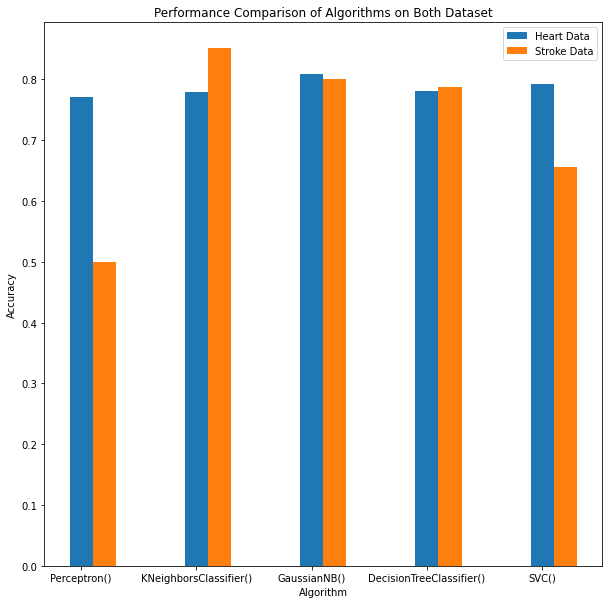

In [280]:
# Accuracy of datasets for different model
dataset1 = acc_mean_1
dataset2 = acc_mean_2

#list of algorithms used
alg_list = models
# We cannot add width to year so we create another list
indices = np.arange(len(alg_list))

width = 0.20

# Plotting

plt.figure(figsize=(10, 10))
plt.bar(indices, dataset1, width=width)


plt.bar(indices + width, dataset2, width=width)


plt.xticks(ticks=indices, labels=alg_list)

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Performance Comparison of Algorithms on Both Dataset")
plt.legend(['Heart Data', 'Stroke Data'])
plt.show()